In [1]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

WARNING ⚠️ 'yolo mode=checks' is deprecated. Use 'yolo checks' instead.
Ultralytics YOLOv8.0.141 🚀 Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
Setup complete ✅ (64 CPUs, 157.0 GB RAM, 696.5/1286.9 GB disk)


In [2]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="QRU7h6jL6zVh4d3yQpPH")
# project = rf.workspace("cv-jcyml").project("new-ixadq")
# dataset = project.version(2).download("yolov8")
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QRU7h6jL6zVh4d3yQpPH")
project = rf.workspace("ucla-mqe-9hpil").project("diabetic-retinopathy-detection-ctro6")
dataset = project.version(1).download("yolov8")



print(dataset)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.141, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Diabetic-Retinopathy-Detection-1 in yolov8:: 100%|██████████| 292/292 [00:00<00:00, 996.76it/s] 


In [3]:
print(dataset.location)

/root/Work/yolov8/Diabetic-Retinopathy-Detection-1


In [6]:
!yolo task=segment mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=20 imgsz=640
# !yolo task=segment mode=train model=yolov8n-seg.pt data=box-2/box-2/data.yaml epochs=20 imgsz=640

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
New https://pypi.org/project/ultralytics/8.0.149 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.141 🚀 Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/root/Work/yolov8/Diabetic-Retinopathy-Detection-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=

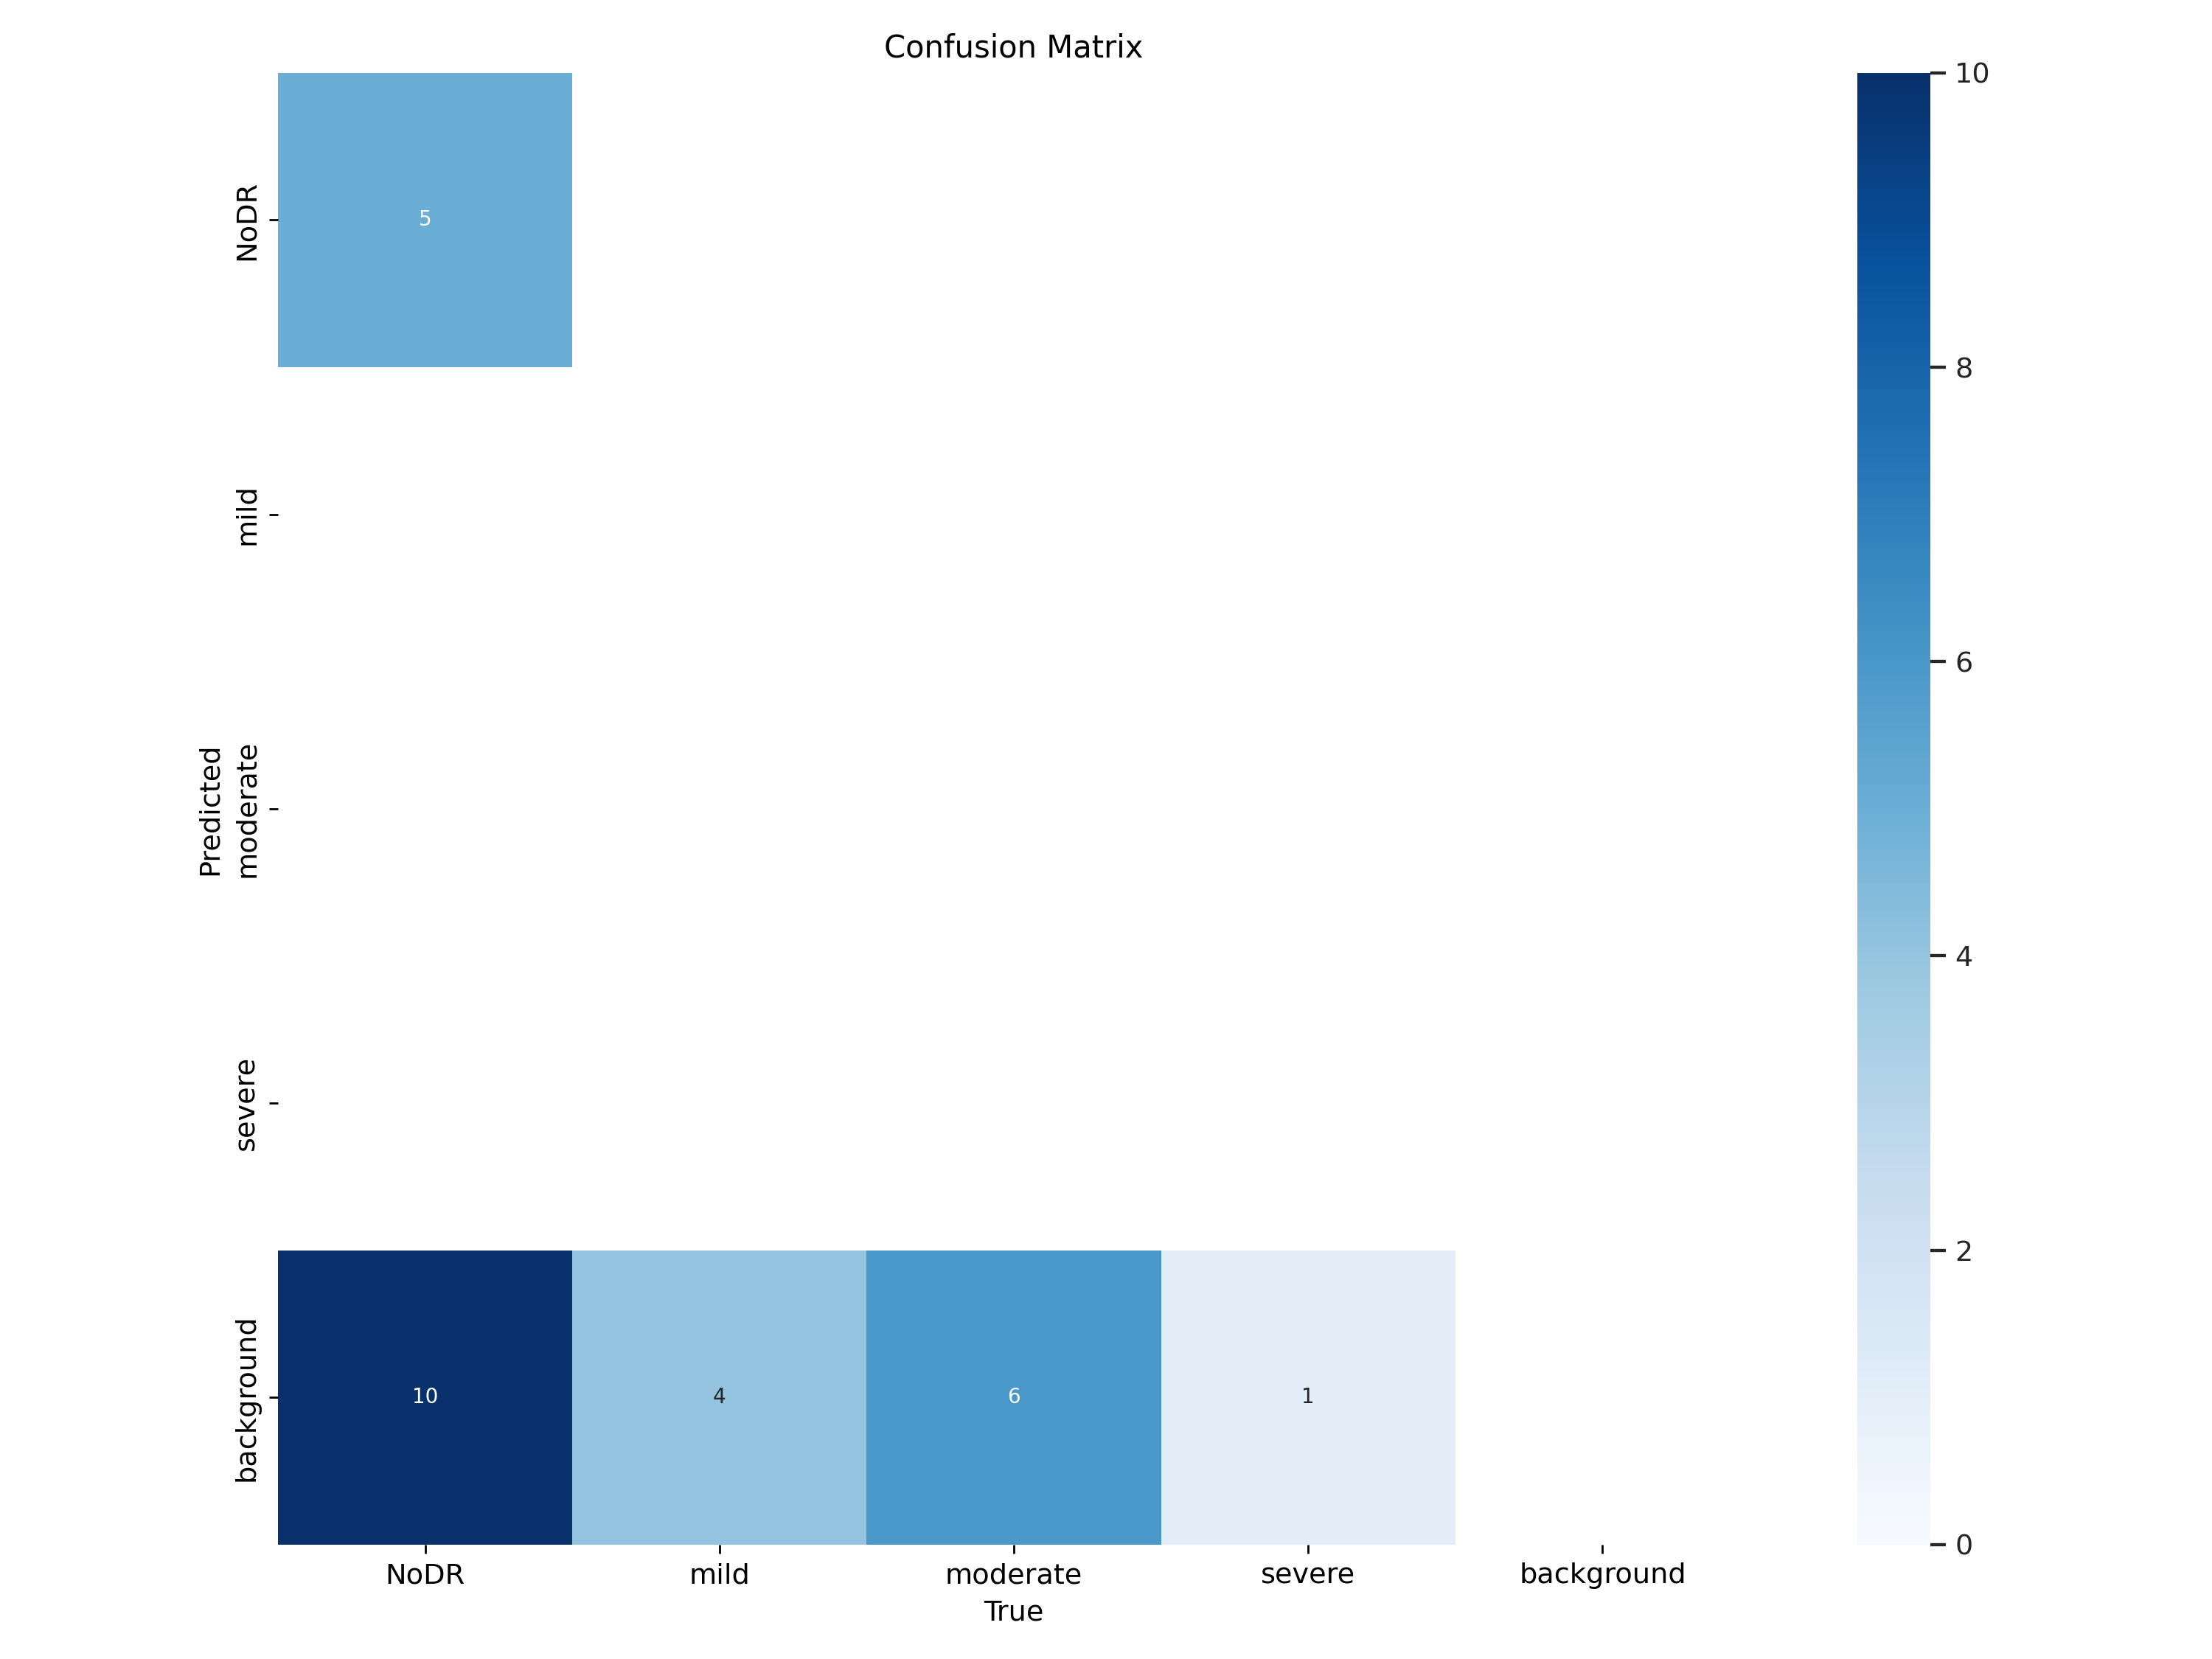

In [12]:
Image(filename=f'/root/.pyenv/runs/detect/train/confusion_matrix.png', width=600)

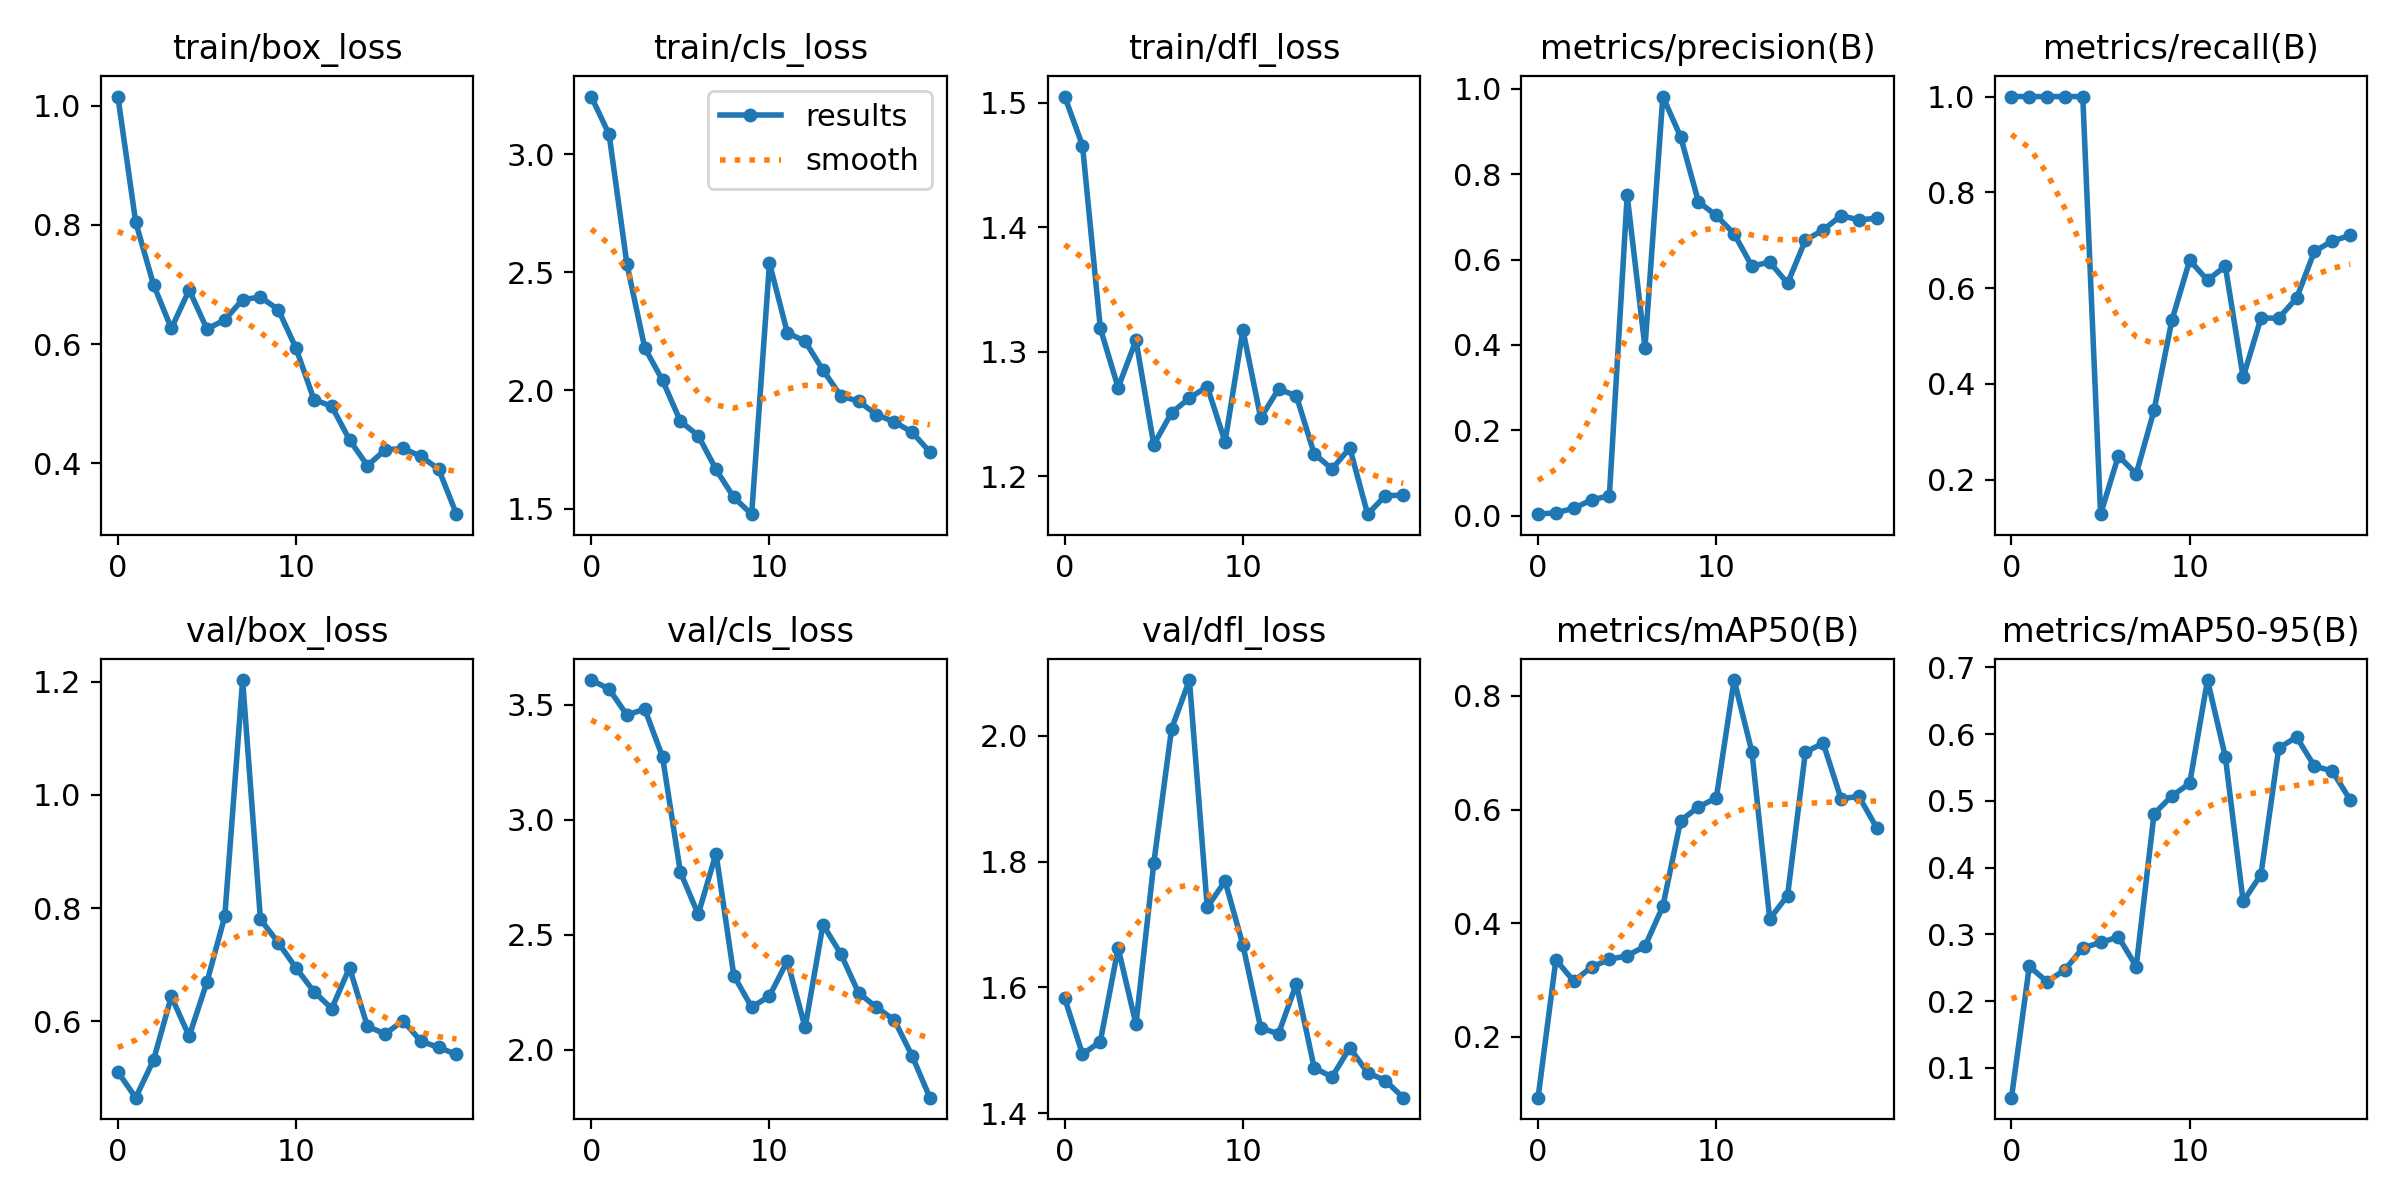

In [11]:
Image(filename=f'/root/.pyenv/runs/detect/train/results.png', width=900)

In [15]:
print({dataset.location})

{'/root/Work/yolov8/Diabetic-Retinopathy-Detection-1'}


In [16]:
!yolo task=detect mode=val model=/root/.pyenv/runs/detetct/train/weights/best.pt data={dataset.location}/data.yaml

Traceback (most recent call last):
  File "/root/.pyenv/versions/3.10.11/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/root/.pyenv/versions/3.10.11/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 396, in entrypoint
    model = YOLO(model, task=task)
  File "/root/.pyenv/versions/3.10.11/lib/python3.10/site-packages/ultralytics/engine/model.py", line 106, in __init__
    self._load(model, task)
  File "/root/.pyenv/versions/3.10.11/lib/python3.10/site-packages/ultralytics/engine/model.py", line 155, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/root/.pyenv/versions/3.10.11/lib/python3.10/site-packages/ultralytics/nn/tasks.py", line 622, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/root/.pyenv/versions/3.10.11/lib/python3.10/site-packages/ultralytics/nn/tasks.py", line 561, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/root/.pyen

In [8]:
!yolo task=detect mode=predict model=/root/.pyenv/runs/segment/train5/weights/best.pt conf=0.5 source={dataset.location}/box-2/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.141 🚀 Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients

image 1/14 /root/Work/yolov8/box-2/box-2/test/images/img_100_jpg.rf.dd396ec77823ff3a57df7db3972f68e9.jpg: 640x640 1 box, 10.4ms
image 2/14 /root/Work/yolov8/box-2/box-2/test/images/img_104_jpg.rf.c670c6f269866681ff843a6ba0976672.jpg: 640x640 1 box, 11.3ms
image 3/14 /root/Work/yolov8/box-2/box-2/test/images/img_13_jpg.rf.d45e42fe8f690273549741a0a251a7df.jpg: 640x640 1 box, 10.3ms
image 4/14 /root/Work/yolov8/box-2/box-2/test/images/img_15_jpg.rf.a825241b0ea294e8bbfe6049ac5d2e9b.jpg: 640x640 1 box, 9.7ms
image 5/14 /root/Work/yolov8/box-2/box-2/test/images/img_1_jpg.rf.e7884596589e63a74d5c58c3d9446262.jpg: 640x640 1 box, 9.6ms
image 6/14 /root/Work/yolov8/box-2/box-2/test/images/img_2_jpg.rf.3adb571bdd5a70bb33ea431f3a93edd0.jpg: 640x640 1 box, 9.6ms
image 7/14 /root/Work/yolov8/box-2/box-2/test/images/img_45_jpg.

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/root/.pyenv/runs/segment/predict/2.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")